In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
ramen = pd.read_csv('ramen-ratings.csv')
ramen.head(100)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
95,2485,Nissin,Cup Noodles Shrimps,Cup,Germany,3,NaN
96,2484,Nissin,Demae Ramen Tokyo Soy Sauce,Pack,Germany,4,NaN
97,2483,Paldo,Bul Jjamppong,Bowl,South Korea,5,NaN
98,2482,TTL,Chicken With Chinese Shaoxing Wine,Pack,Taiwan,4.75,NaN


In [78]:
ramen_barh = ramen[ramen['Country']=='USA'].sort_values('Review #', ascending=False).head(15)
ramen_barh

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
11,2569,Yamachan,Yokohama Tonkotsu Shoyu,Pack,USA,5,NaN
17,2563,Yamachan,Tokyo Shoyu Ramen,Pack,USA,5,NaN
21,2559,Jackpot Teriyaki,Beef Ramen,Pack,USA,5,NaN
23,2557,Yamachan,Sapporo Miso Ramen,Pack,USA,4.75,NaN
36,2544,Lipton,Cup-A-Soup Chicken Noodle With White Meat Inst...,Box,USA,1.5,NaN
39,2541,Nissin,Cup Noodles Very Veggie Spicy Chicken Flavor R...,Cup,USA,5,NaN
42,2538,Nissin,Cup Noodles Very Veggie Beef Flavor Ramen Nood...,Cup,USA,5,NaN
45,2535,Nissin,Cup Noodles Very Veggie Chicken Flavor Ramen N...,Cup,USA,5,NaN
67,2513,Pringles,Nissin Top Ramen Chicken Flavor Potato Crisps,Can,USA,3.5,NaN


<BarContainer object of 15 artists>

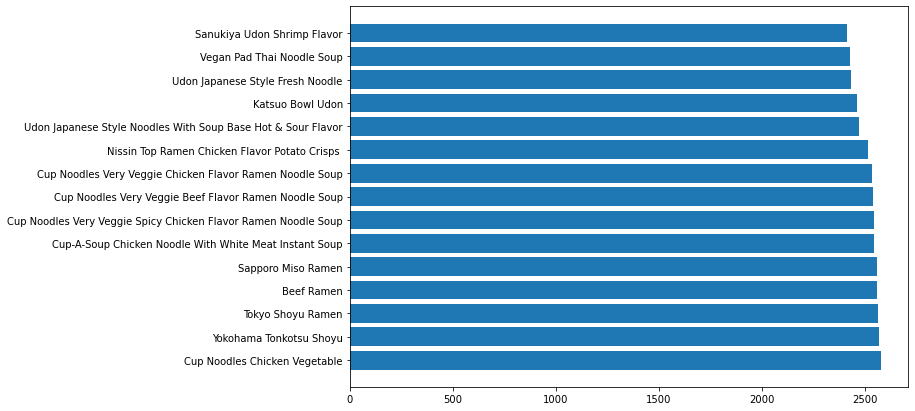

In [79]:
plt.barh(ramen_barh['Variety'], ramen_barh['Review #'])

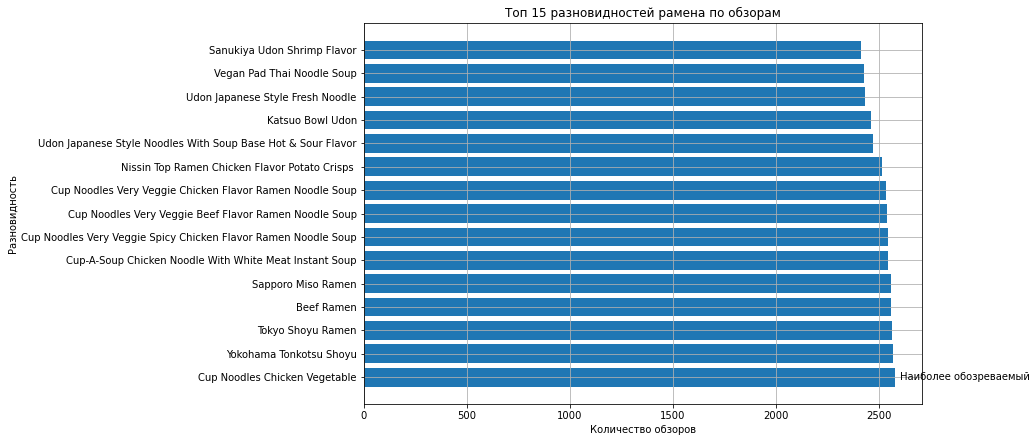

In [103]:
plt.barh(ramen_barh['Variety'], ramen_barh['Review #'])
plt.xlabel('Количество обзоров')
plt.ylabel('Разновидность')
plt.title('Топ 15 разновидностей рамена по обзорам')
plt.text(2600, -0.1, 'Наиболее обозреваемый')
plt.grid(15)

In [111]:
ramen_d = ramen.groupby('Stars').mean()

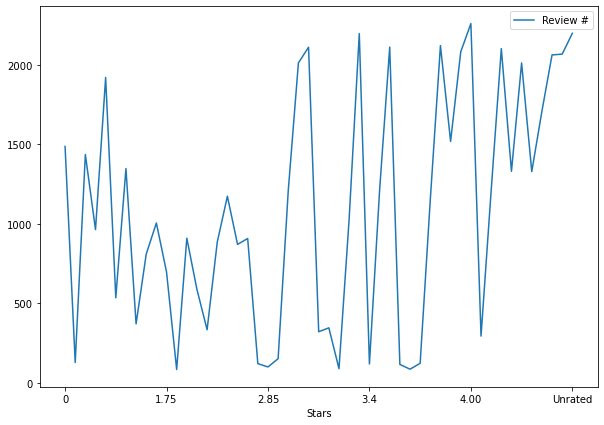

In [112]:
ramen_d.plot()

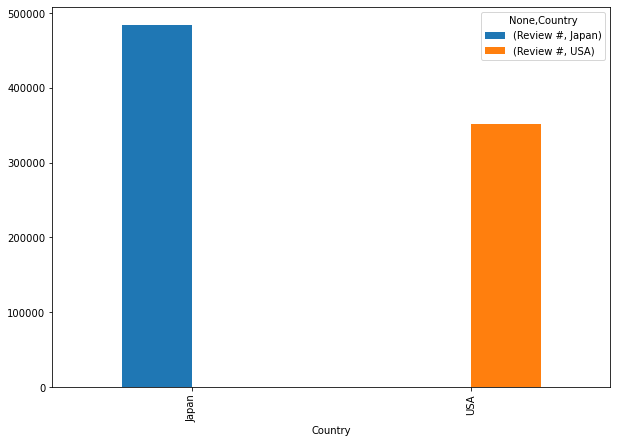

In [156]:
ramen_dynamics = ramen.groupby([ramen.Country,'Country']).sum()
ramen_dynamics = ramen_dynamics.loc[(ramen_dynamics.index.get_level_values(0).isin(['Japan', 'USA']))]
ramen_dynamics.unstack().plot(kind='bar')

# Видно что, в Японии обзоров сделали больше, чем в США

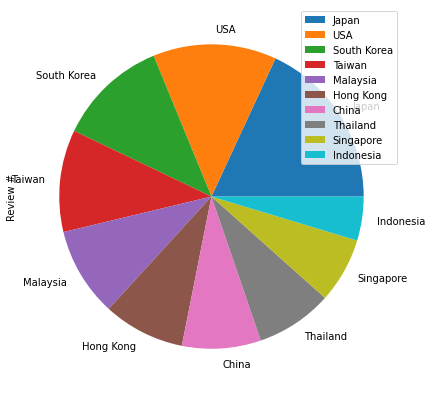

In [159]:
ramen_dynamics = ramen.groupby(['Country']).sum().sort_values(by='Review #', ascending=False).head(10)
ramen_dynamics.plot(kind='pie', y='Review #')

# По круговой диаграмме также видно, что обзоры на рамен преобладают в Японии, США, Южной Корее

Text(0, 0.5, 'Количество обзоров')

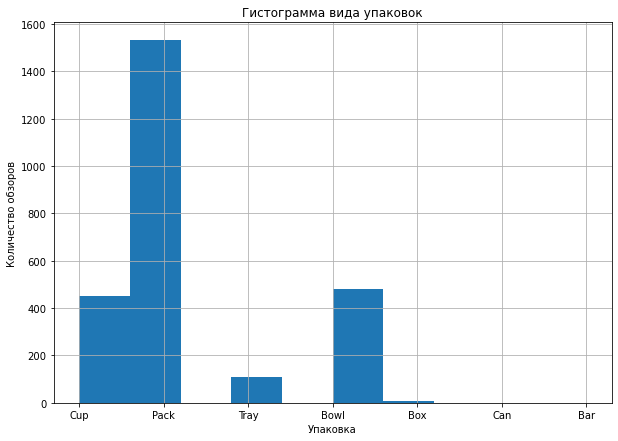

In [165]:
ramen_hist = ramen.Style.hist()
ramen_hist.set_title('Гистограмма вида упаковок')
ramen_hist.set_xlabel('Упаковка')
ramen_hist.set_ylabel('Количество обзоров')

# Видно, что наибольшее количество обзоров было сделано на упаковочные рамёны, можно предположить, что это была доставка

In [164]:
import seaborn as sns

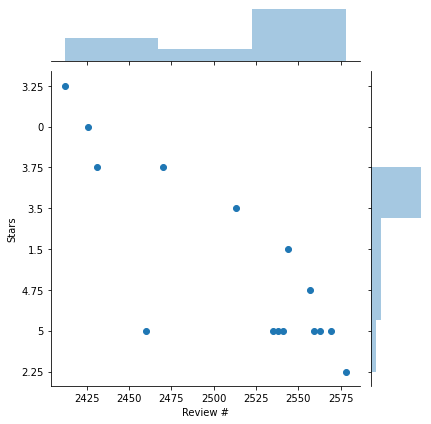

In [179]:
sns.jointplot(x='Review #', y='Stars', 
              data=ramen_barh, kind='scatter')